In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from keras.datasets import mnist

In [72]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [73]:
#Make a copy of training data
x_train_copy = x_train.copy()

In [74]:
#Flatten the training data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_train.shape

(60000, 784)

In [75]:
#Make a copy of training classes
y_train_copy = y_train.copy()

In [76]:
#Convert class labels to categorical data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [77]:
#Designing the model
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt

In [78]:
model = Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))
model.add(Dropout(rate = 0.8))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(rate = 0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total para

In [87]:
#Training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=30, validation_split=.1)
loss,accuracy=model.evaluate(x_test,y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 45us/step - loss: 0.8679 - acc: 0.7158 - val_loss: 0.3198 - val_acc: 0.9177
Epoch 2/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.8749 - acc: 0.7150 - val_loss: 0.3040 - val_acc: 0.9208
Epoch 3/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.8913 - acc: 0.7046 - val_loss: 0.3156 - val_acc: 0.9225
Epoch 4/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.8868 - acc: 0.7059 - val_loss: 0.3203 - val_acc: 0.9178
Epoch 5/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.8817 - acc: 0.7098 - val_loss: 0.3082 - val_acc: 0.9232
Epoch 6/30
54000/54000 [==============================] - 2s 36us/step - loss: 0.8914 - acc: 0.7033 - val_loss: 0.3200 - val_acc: 0.9182
Epoch 7/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.8830 - acc: 0.7098 - val_loss: 0.3103 - val_acc:

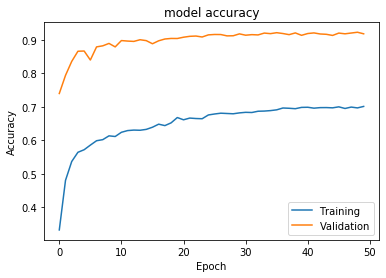

In [80]:
#Plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [81]:
# print(history.history.keys())

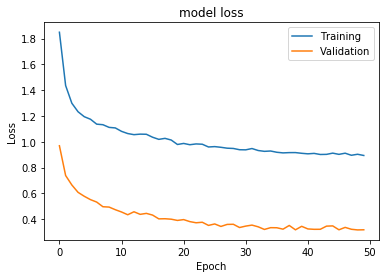

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [83]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.368
Test accuracy: 0.897


In [84]:
#Prepare custom dataset
import cv2
x_test_new=[]
n_data=10

for i in range(n_data):
    path=(str)(i)+".png"
    print(path)
    x=cv2.imread(path,0)
    x=x
    x_test_new.append(x)

0.png
1.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png


In [85]:
x_test_new=np.array(x_test_new)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1] * x_test_new.shape[2])

y_test_new=[]
for i in range(n_data):
    y_test_new.append(i)
    
y_test_new=np.array(y_test_new)
y_test_new=y_test_new.astype('uint8')

y_test_new = keras.utils.to_categorical(y_test_new, 10)

In [88]:
#Test on the new test set
loss2,accuracy2=model.evaluate(x_test_new,y_test_new)
print(accuracy2)

10/10 [==============================] - 0s 369us/step
0.10000000149011612
